Some usefull links:

1. Python: https://www.python.org/downloads/

2. pip: 
    https://realpython.com/what-is-pip/ , 
    https://pip.pypa.io/en/stable/installation/ , 
    https://pip.pypa.io/en/stable/cli/pip_list/ 

3. Jupiter notebook: https://jupyter.org
       
4. Pycharm: https://www.jetbrains.com/pycharm/

5. Anaconda: https://www.anaconda.com/products/individual

---

libraries: 

- Numpy https://numpy.org 
- Pandas https://pandas.pydata.org 
- Scikit-learn https://scikit-learn.org/stable/ 
- matplotlib https://matplotlib.org 

In [157]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

Airbnb dataset: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 

In [239]:
airbnb_ori = pd.read_csv('AB_NYC_2019.csv')
airbnb = airbnb_ori.copy()

In [207]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [208]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<AxesSubplot:>

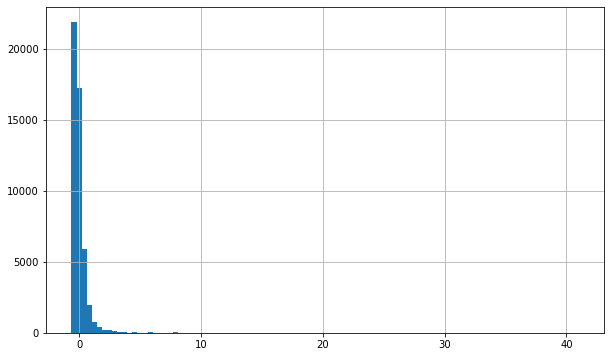

In [238]:
plt.figure(figsize=(10, 6))
airbnb['price'].hist(bins=100)

## Data cleaning 

In [210]:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(airbnb)

name => 16
host_name => 21
last_review => 10052
reviews_per_month => 10052


In [211]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(airbnb)

name => 0.03%
host_name => 0.04%
last_review => 20.56%
reviews_per_month => 20.56%


<AxesSubplot:>

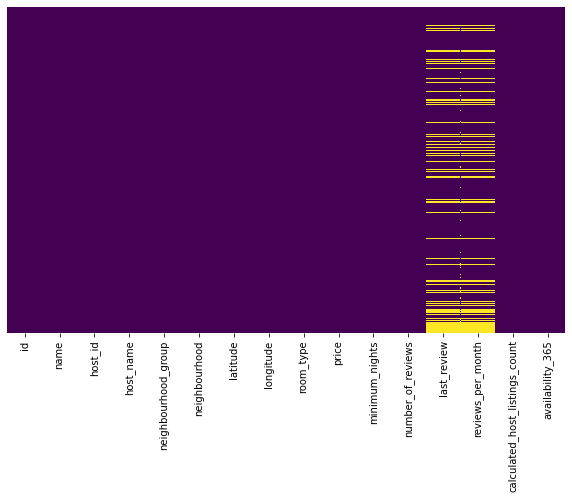

In [212]:
plt.figure(figsize=(10, 6))
sns.heatmap(airbnb.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [213]:
# Drop unnecessary columns that are not important
colsToDrop = ['id','host_name']
airbnb.drop(colsToDrop, axis=1, inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

In [214]:
# remove rows with missing values
airbnb_drop = airbnb.dropna()
airbnb_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38837 entries, 0 to 48852
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            38837 non-null  object 
 1   host_id                         38837 non-null  int64  
 2   neighbourhood_group             38837 non-null  object 
 3   neighbourhood                   38837 non-null  object 
 4   latitude                        38837 non-null  float64
 5   longitude                       38837 non-null  float64
 6   room_type                       38837 non-null  object 
 7   price                           38837 non-null  int64  
 8   minimum_nights                  38837 non-null  int64  
 9   number_of_reviews               38837 non-null  int64  
 10  last_review                     38837 non-null  object 
 11  reviews_per_month               38837 non-null  float64
 12  calculated_host_listings_count  

In [215]:
# imputing review per month with mean
reviews_per_month_mean_value = round(airbnb['reviews_per_month'].mean(), 2)
airbnb['reviews_per_month'].fillna(reviews_per_month_mean_value, inplace=True)

# imputing price with median
reviews_per_month_median_value = round(airbnb['reviews_per_month'].median(), 2)
airbnb['reviews_per_month'].fillna(reviews_per_month_median_value, inplace=True)

################ imputing with SimpleImputor from the sklearn library
from sklearn.impute import SimpleImputer
# define the imputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean') # or median

airbnb[['reviews_per_month']] = imr.fit_transform(airbnb[['reviews_per_month']])

# use strategy = 'most_frequent' for categorical data

<AxesSubplot:>

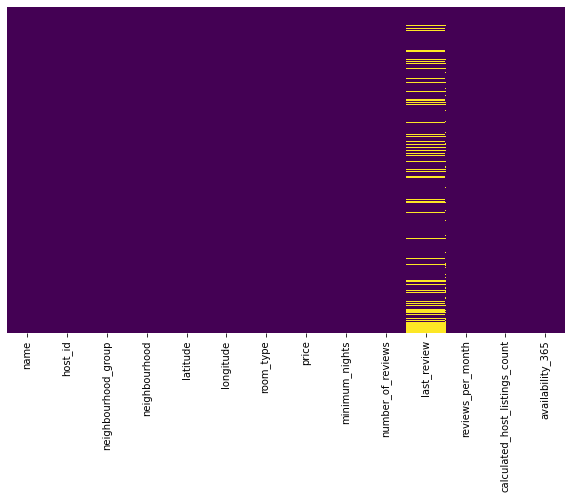

In [216]:
plt.figure(figsize=(10, 6))
sns.heatmap(airbnb.isnull(), yticklabels=False, cmap='viridis', cbar=False)

<AxesSubplot:>

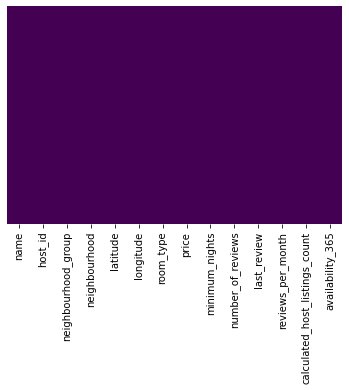

In [217]:
# replace null values in reviews_per_month with 0 
airbnb.fillna({'last_review':0}, inplace=True)

sns.heatmap(airbnb.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [218]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [219]:
random_index = airbnb.sample(2, random_state = 10).index

# airbnb['neighbourhood_group'].loc[random_index]
## we randomly selected Manhattan and Brooklyn

wrong_spelling = ['manhatann', 'brookln']

# replace them with the wrong spelling
airbnb.loc[random_index,'neighbourhood_group'] = wrong_spelling
airbnb['neighbourhood_group'].value_counts()

Manhattan        21660
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
brookln              1
manhatann            1
Name: neighbourhood_group, dtype: int64

In [220]:
airbnb['neighbourhood_group'].replace(['manhatann', 'brookln'],
                             ['Manhattan', 'Brooklyn'], inplace=True)

airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot:>

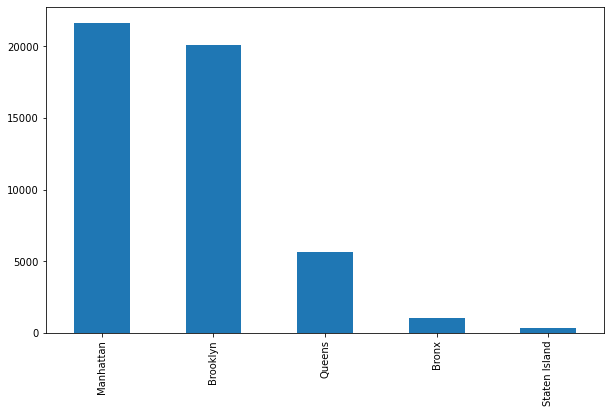

In [221]:
plt.figure(figsize=(10, 6))
airbnb['neighbourhood_group'].value_counts().plot.bar()

In [222]:
airbnb.duplicated().any()

## if true
# airbnb.drop_duplicates()

## if you want to drop duplicates at specific column
# airbnb.drop('col_name', axis=1, inplace=True).drop_duplicates()

False

###### Imputing the missing values based on the other variables (multivariate imputation)
rain in australia dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [240]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import mean_squared_error

In [242]:
# Reading in the data and selecting the continous features
df = pd.read_csv('weatherAUS.csv')
cont_feats = [col for col in df.columns if df[col].dtype != object]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [245]:
perc_missing(df)
print('------------------------')
missing_cols(df)

MinTemp => 1.02%
MaxTemp => 0.87%
Rainfall => 2.24%
Evaporation => 43.17%
Sunshine => 48.01%
WindGustDir => 7.1%
WindGustSpeed => 7.06%
WindDir9am => 7.26%
WindDir3pm => 2.91%
WindSpeed9am => 1.21%
WindSpeed3pm => 2.11%
Humidity9am => 1.82%
Humidity3pm => 3.1%
Pressure9am => 10.36%
Pressure3pm => 10.33%
Cloud9am => 38.42%
Cloud3pm => 40.81%
Temp9am => 1.21%
Temp3pm => 2.48%
RainToday => 2.24%
RainTomorrow => 2.25%
------------------------
MinTemp => 1485
MaxTemp => 1261
Rainfall => 3261
Evaporation => 62790
Sunshine => 69835
WindGustDir => 10326
WindGustSpeed => 10263
WindDir9am => 10566
WindDir3pm => 4228
WindSpeed9am => 1767
WindSpeed3pm => 3062
Humidity9am => 2654
Humidity3pm => 4507
Pressure9am => 15065
Pressure3pm => 15028
Cloud9am => 55888
Cloud3pm => 59358
Temp9am => 1767
Temp3pm => 3609
RainToday => 3261
RainTomorrow => 3267


<AxesSubplot:>

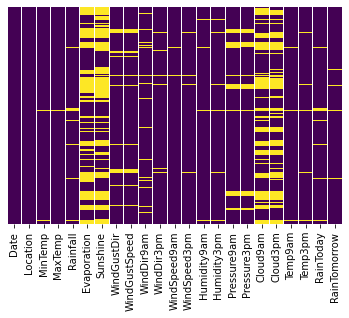

In [246]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [243]:
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
mean_imputed = mean_imputer.fit_transform(df[cont_feats])
df_mean_imputed = pd.DataFrame(mean_imputed, columns=cont_feats)

# Median Imputation
median_imputer = SimpleImputer(strategy='median')
median_imputed = median_imputer.fit_transform(df[cont_feats])
df_median_imputed = pd.DataFrame(median_imputed, columns=cont_feats)

# Iterative Imputation
iter_imputer = IterativeImputer(random_state=42)
iter_imputed = iter_imputer.fit_transform(df[cont_feats])
df_iter_imputed = pd.DataFrame(iter_imputed, columns=cont_feats)

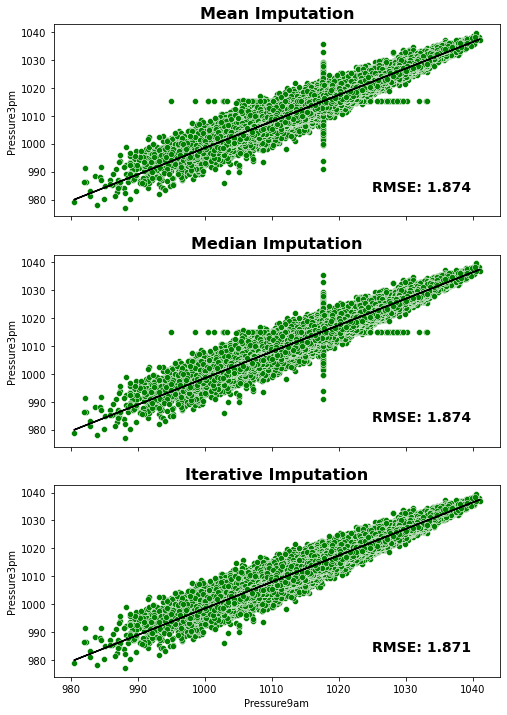

In [247]:
# Plotting a comparison between the different strategies
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 12))
axes = np.reshape(axes, -1)

dfs = [df_mean_imputed, df_median_imputed, df_iter_imputed]
titles = ['Mean Imputation', 'Median Imputation', 'Iterative Imputation']

for i, df in enumerate(dfs):
    # Plotting the data
    x = df.Pressure9am
    y = df.Pressure3pm
    sns.scatterplot(x, y, ax=axes[i], color='green')
    
    # Fitting and plotting a linear regression line
    m, b = np.polyfit(x, y, 1)
    linreg = m*x + b
    axes[i].plot(x, linreg, color='black')
    
    # Setting the titles and including the RMSE values
    axes[i].set_title(titles[i], fontsize=16, fontweight='bold')
    rmse = round(mean_squared_error(y, linreg, squared=False), 3)
    axes[i].text(1025, 983, f'RMSE: {rmse}', fontsize=14, fontweight='bold')

## Data transformation

### standardisation
Standardization centers the data so that every column has a mean of zero and unit variance. This process is sensitive to outliers in the dataset. 

In [44]:
#Create a new data frame 
df = pd.DataFrame({'y': [8, 12, 15, 14, 19, 23, 25, 29],
                   'x1': [5, 7, 7, 9, 12, 9, 9, 4],
                   'x2': [11, 8, 10, 6, 6, 5, 9, 12],
                   'x3': [2, 2, 3, 2, 5, 5, 7, 9]})

#view data frame
df

,y,x1,x2,x3
0,8,5,11,2
1,12,7,8,2
2,15,7,10,3
3,14,9,6,2
4,19,12,6,5
5,23,9,5,5
6,25,9,9,7
7,29,4,12,9


In [45]:
df.describe()

,y,x1,x2,x3
count,8.000000,8.00000,8.000000,8.000000
mean,18.125000,7.75000,8.375000,4.375000
std,7.140178,2.54951,2.559994,2.615203
min,8.000000,4.00000,5.000000,2.000000
25%,13.500000,6.50000,6.000000,2.000000
50%,17.000000,8.00000,8.500000,4.000000
75%,23.500000,9.00000,10.250000,5.500000
max,29.000000,12.00000,12.000000,9.000000


In [46]:
#standardize the values in each column
df_new = (df-df.mean())/df.std()

#view new data frame
df_new

,y,x1,x2,x3
0,-1.418032,-1.078639,1.025393,-0.908151
1,-0.857822,-0.294174,-0.146485,-0.908151
2,-0.437664,-0.294174,0.634767,-0.525772
3,-0.577717,0.490290,-0.927736,-0.908151
4,0.122546,1.666987,-0.927736,0.238987
5,0.682756,0.490290,-1.318362,0.238987
6,0.962861,0.490290,0.244141,1.003746
7,1.523071,-1.470871,1.416019,1.768505


In [47]:
df_new.describe()

,y,x1,x2,x3
count,8.000000,8.000000e+00,8.000000e+00,8.000000e+00
mean,0.000000,5.551115e-17,-2.775558e-17,-2.775558e-17
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.418032,-1.470871e+00,-1.318362e+00,-9.081514e-01
25%,-0.647743,-4.902903e-01,-9.277364e-01,-9.081514e-01
50%,-0.157559,9.805807e-02,4.882823e-02,-1.433923e-01
75%,0.752782,4.902903e-01,7.324235e-01,4.301770e-01
max,1.523071,1.666987e+00,1.416019e+00,1.768505e+00


Coming back to airnbnb dataframe:

In [48]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [224]:
airbnb[("price")] = (airbnb[("price")] - airbnb[("price")].mean()) / airbnb[("price")].std() 
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,5.465285e-16,7.029962,23.274466,1.372559,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,1.000000e+00,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,-6.359277e-01,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,-3.486123e-01,1.000000,1.000000,0.280000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,-1.945446e-01,3.000000,5.000000,1.220000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,9.277088e-02,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,4.100399e+01,1250.000000,629.000000,58.500000,327.000000,365.000000


### Normalisation 
Normalization: Normalization is a process of scaling input vectors individually to the unit norm (magnitude of one) and is applied on records (rows/vectors). 

L1 (manhattan distance)— a sum of absolute values of components of vector; a most natural way of measure distance between vectors

L2 (euclidean distance) — a distance of the vector coordinate from the origin of the vector space. definition of vector magnitude;


In [231]:
airbnb[("reviews_per_month")].describe()

count    48895.000000
mean         1.372559
std          1.497775
min          0.010000
25%          0.280000
50%          1.220000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

In [230]:
#L1 scaling 
airbnb_norm1  = airbnb[("reviews_per_month")]/np.linalg.norm(airbnb[("reviews_per_month")],ord =1)
airbnb_norm1.describe()

count    4.889500e+04
mean     2.045199e-05
std      2.231779e-05
min      1.490062e-07
25%      4.172175e-06
50%      1.817876e-05
75%      2.354299e-05
max      8.716865e-04
Name: reviews_per_month, dtype: float64

In [227]:
#L2 scaling 
airbnb_norm1  = airbnb[("reviews_per_month")]/np.linalg.norm(airbnb[("reviews_per_month")],ord =2)
airbnb_norm1.describe()

count    48895.000000
mean         0.003055
std          0.003334
min          0.000022
25%          0.000623
50%          0.002716
75%          0.003517
max          0.130225
Name: reviews_per_month, dtype: float64

## Data reduction 

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

Diabetes dataframe: https://www.kaggle.com/uciml/pima-indians-diabetes-database 

In [129]:
data = pd.read_csv("diabetes.csv", header=None)
data

# retrieve numpy array
dataset = data.values

# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

In [131]:
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (515, 8) (515,)
Test (254, 8) (254,)


### Filter methods
#### ANOVA (Analysis of Variance) 
it looks across multiple groups of populations and compares the means/averages of these populations to produce one score and one significance value indicating how different these populations are.

Feature 0: 21.952926
Feature 1: 134.995132
Feature 2: 1.868609
Feature 3: 2.141532
Feature 4: 6.303769
Feature 5: 41.691993
Feature 6: 11.759834
Feature 7: 26.831139


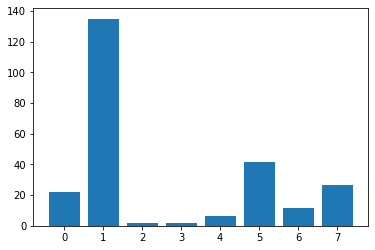

In [135]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Information Gain 
it calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

Feature 0: 0.000000
Feature 1: 0.117720
Feature 2: 0.007324
Feature 3: 0.035009
Feature 4: 0.036227
Feature 5: 0.064082
Feature 6: 0.014167
Feature 7: 0.043958


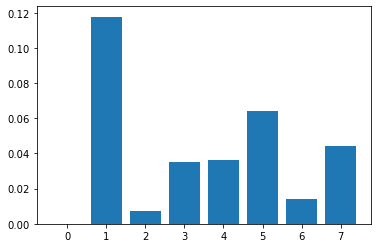

In [139]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Correlation
It is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

In [145]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [152]:
data = pd.read_csv('breast_cancer.csv')
data = data.iloc[:,1:-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<AxesSubplot:>

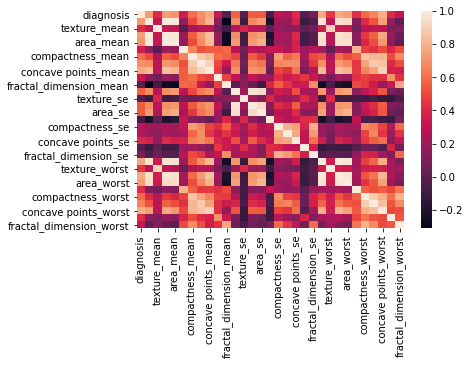

In [146]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

corr = data.corr()
sns.heatmap(corr)

In [153]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data_corr = data[selected_columns]
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   compactness_mean         569 non-null    float64
 5   concavity_mean           569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   fractal_dimension_mean   569 non-null    float64
 8   radius_se                569 non-null    float64
 9   texture_se               569 non-null    float64
 10  smoothness_se            569 non-null    float64
 11  compactness_se           569 non-null    float64
 12  concavity_se             569 non-null    float64
 13  concave points_se        569 non-null    float64
 14  symmetry_se              5

## Dimentionality reduction
### Manifold learning: t-sne
Used when data in higher dimensions is non-linear. This technique involves unrolling the data so that the twist and turns in higher dimensions are smoothened out when the data is expressed in lower dimensionality. Manifold learning works best when the data lies along a rolled-up surface, such as a swiss roll or an S-curve, the data has a simpler form. In lower dimensionality, it’s curved into a more complex form and higher dimensionality.

###### Two famous datasets (already available in some of python packages):
    Iris dataset: https://www.kaggle.com/uciml/iris 
    MNIST dataset: http://yann.lecun.com/exdb/mnist


In [158]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape 

In [164]:
iris = load_iris()
x = iris.data
y = iris.target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [165]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.001s...
[t-SNE] Computed neighbors for 150 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.387672
[t-SNE] KL divergence after 1000 iterations: 0.129141


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

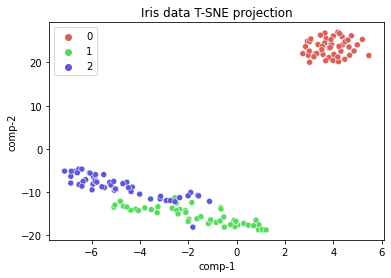

In [166]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection")

In [167]:
(x_train, y_train), (_ , _) = mnist.load_data()
x_train = x_train[:3000]
y_train = y_train[:3000]
print(x_train.shape) 

(3000, 28, 28)


In [168]:
print(x_train.shape)
x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)
 

(3000, 28, 28)
(3000, 784)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.003s...
[t-SNE] Computed neighbors for 3000 samples in 0.883s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.366257
[t-SNE] KL divergence after 1000 iterations: 1.271629


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

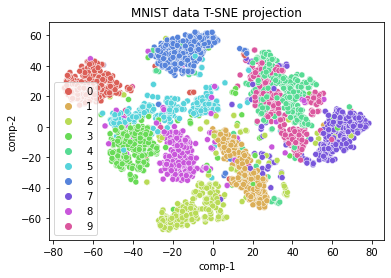

In [169]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

#### Projection: factor analysis 
Try and find new better axes and reorient the current dataset to be expressed along with this projection.

In [170]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, random_state=123)
z = fa.fit_transform(x_mnist) 



[Text(0.5, 1.0, 'MNIST data projection with Factor Analysis')]

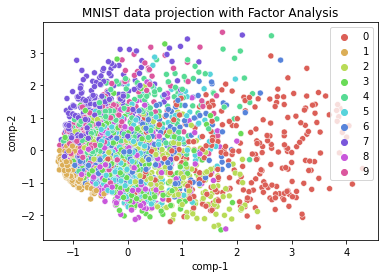

In [171]:
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data projection with Factor Analysis")

## Overfitting vs Underfitting: an interesting example  
We will look at an example of overfitting a machine learning model to a training dataset.

First, let’s define a synthetic classification dataset.
We will use the make_classification() function to define a binary (two class) classification prediction problem with 10,000 examples (rows) and 20 input features (columns).

We will use a decision tree via the DecisionTreeClassifier and test different tree depths with the “max_depth” argument.

Shallow decision trees (e.g. few levels) generally do not overfit but have poor performance (high bias, low variance). Whereas deep trees (e.g. many levels) generally do overfit and have good performance (low bias, high variance). A desirable tree is one that is not so shallow that it has low skill and not so deep that it overfits the training dataset.

>1, train: 0.765, test: 0.763
>2, train: 0.805, test: 0.802
>3, train: 0.878, test: 0.873
>4, train: 0.899, test: 0.896
>5, train: 0.914, test: 0.904
>6, train: 0.931, test: 0.916
>7, train: 0.940, test: 0.921
>8, train: 0.953, test: 0.925
>9, train: 0.960, test: 0.924
>10, train: 0.966, test: 0.924
>11, train: 0.971, test: 0.923
>12, train: 0.977, test: 0.922
>13, train: 0.982, test: 0.922
>14, train: 0.985, test: 0.920
>15, train: 0.990, test: 0.915
>16, train: 0.993, test: 0.913
>17, train: 0.996, test: 0.913
>18, train: 0.998, test: 0.909
>19, train: 0.999, test: 0.914
>20, train: 0.999, test: 0.913


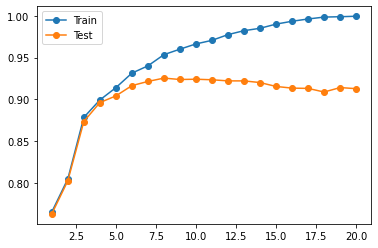

In [173]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Sometimes, we may perform an analysis of machine learning model behavior and be deceived by the results.

A good example of this is varying the number of neighbors for the k-nearest neighbors algorithms, which we can implement using the KNeighborsClassifier class and configure via the “n_neighbors” argument.

Let’s forget how KNN works for the moment.

We can perform the same analysis of the KNN algorithm as we did in the previous section for the decision tree and see if our model overfits for different configuration values. In this case, we will vary the number of neighbors from 1 to 50 to get more of the effect.

>1, train: 1.000, test: 0.914
>2, train: 0.963, test: 0.915
>3, train: 0.961, test: 0.924
>4, train: 0.957, test: 0.926
>5, train: 0.955, test: 0.929
>6, train: 0.953, test: 0.929
>7, train: 0.950, test: 0.928
>8, train: 0.950, test: 0.930
>9, train: 0.948, test: 0.931
>10, train: 0.948, test: 0.929
>11, train: 0.947, test: 0.931
>12, train: 0.947, test: 0.931
>13, train: 0.946, test: 0.931
>14, train: 0.945, test: 0.930
>15, train: 0.945, test: 0.929
>16, train: 0.945, test: 0.930
>17, train: 0.944, test: 0.929
>18, train: 0.943, test: 0.926
>19, train: 0.943, test: 0.927
>20, train: 0.944, test: 0.928
>21, train: 0.942, test: 0.928
>22, train: 0.944, test: 0.927
>23, train: 0.941, test: 0.926
>24, train: 0.941, test: 0.925
>25, train: 0.941, test: 0.926
>26, train: 0.942, test: 0.927
>27, train: 0.940, test: 0.927
>28, train: 0.940, test: 0.925
>29, train: 0.939, test: 0.927
>30, train: 0.939, test: 0.925
>31, train: 0.938, test: 0.926
>32, train: 0.939, test: 0.926
>33, train: 0.938

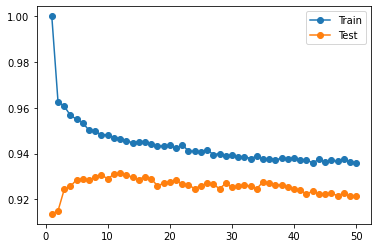

In [174]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()